# 🧠 Workforce Attrition - EDA

**Author:** Saurabh Shrivastav  
**Dataset:** IBM HR Analytics Dataset  
**Objective:** To explore employee-related features and uncover patterns leading to attrition. The goal is to derive actionable insights and prepare for predictive modeling.


## 1. 📦 Load Dataset

In [47]:
# Import required libraries
import pandas as pd

# Load dataset from local path
df = pd.read_csv("/Users/saurabhshrivastav/Desktop/Data Analysis Projects/workforce-analytics/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preview the first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. 🧹 Dataset Overview & Data Cleaning
Let's get an understanding of the dataset structure, size, and cleanliness.

In [48]:
# Shape of the dataset (rows, columns)
df.shape

(1470, 35)

In [49]:
# Check for missing/null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [50]:
# Data types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [51]:
# Statistical summary for numeric columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


✅ **Observations:**
- The dataset contains `1470 rows` and `35 columns`.
- There are no missing values.
- Data types are appropriate for analysis.
- Features include demographic, job-related, and satisfaction metrics.

## 3. 🎯 Target Variable Analysis: Attrition

Let’s explore the distribution of our target variable — whether an employee left the company or not.


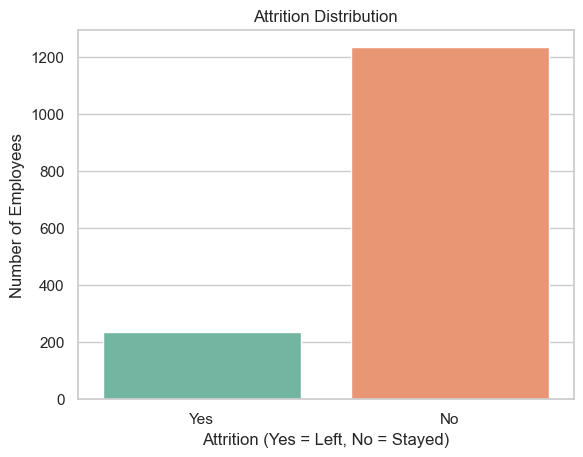

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of Attrition values
sns.countplot(x='Attrition', hue='Attrition', data=df, palette='Set2', legend=False)
plt.title("Attrition Distribution")
plt.xlabel("Attrition (Yes = Left, No = Stayed)")
plt.ylabel("Number of Employees")
plt.show()

# 4. Univariate Analysis

## 4.1 📊 Univariate Analysis – Age

Let’s examine the age distribution of employees.


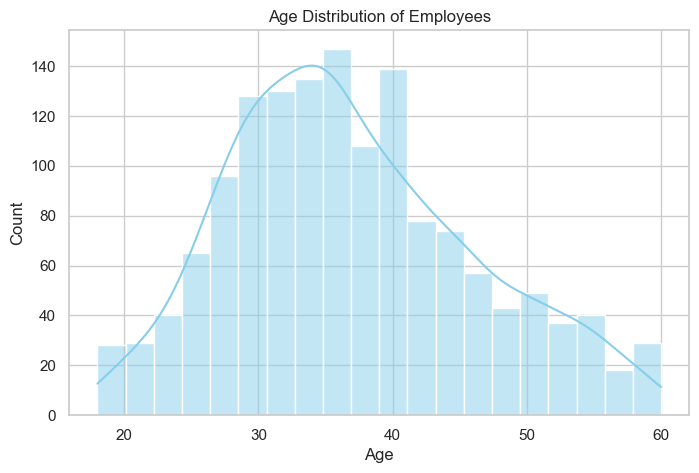

In [53]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

✅ **Observation:**
- Most employees are between 30 and 40 years old.
- There are fewer employees under 25 or over 55.
- The distribution is slightly right-skewed (more younger employees).

## 4.2 🧑‍🤝‍🧑 Univariate Analysis – Gender

Let’s examine the gender distribution of employees.

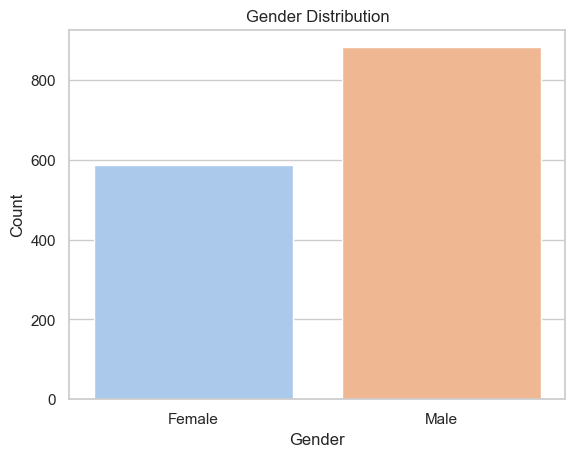

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

In [54]:
# Gender distribution
sns.countplot(x='Gender', hue='Gender', data=df, palette='pastel', legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Value counts
df['Gender'].value_counts(normalize=True) * 100

✅ **Observation:**
- The workforce is slightly male-dominated.
- This may or may not affect attrition — we’ll compare it in bivariate analysis.


## 4.3 💰 Univariate Analysis – Monthly Income

Let’s examine the distribution of employee salaries.


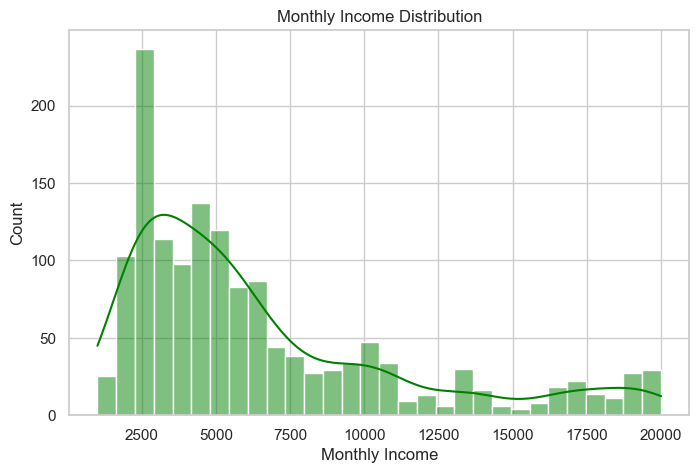

In [55]:
# Monthly Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='green')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

✅ **Observation:**
- The income distribution is **right-skewed** (many earn less, few earn much more).
- This is expected in most companies.
- May require **scaling** for modeling later, and could impact attrition.


## 4.4 🏢 Univariate Analysis – Department

Let’s look at how employees are distributed across departments.


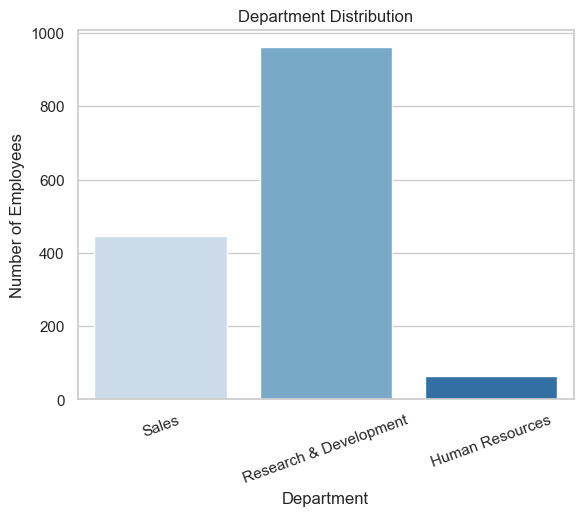

Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64

In [56]:
# Count of employees in each department
sns.countplot(x='Department',hue='Department', data=df, palette='Blues', legend=False)
plt.title("Department Distribution")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=20)
plt.show()

# Optional: View percentage distribution
df['Department'].value_counts(normalize=True) * 100


✅ **Observation:**
- Most employees work in the **Research & Development** department.
- Sales is the next largest group.
- Very few employees are in Human Resources.


# 5. Bivariate Analysis – Comparing with Attrition

## 5.1 👶 Age vs Attrition

Let’s explore how age impacts attrition.

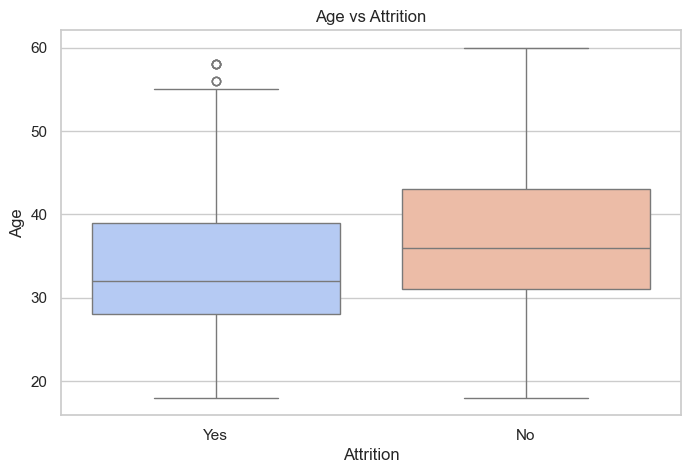

In [62]:
# Create boxplot for Age vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Age', hue='Attrition',  data=df, palette='coolwarm', legend=False)
plt.title('Age vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()


✅ **Observation:**
- Employees who left tend to be **younger** on average.
- Attrition is noticeably higher in the **below 35 age group**.
- Younger employees might be switching jobs for better opportunities.

## 5.2 🚻 Gender vs Attrition

Does attrition differ significantly between male and female employees?

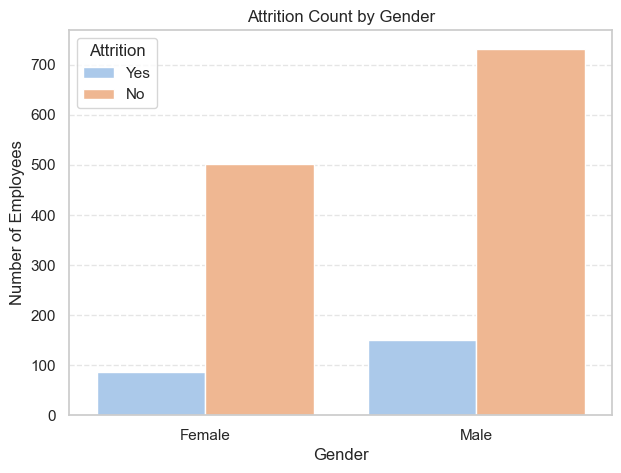

In [65]:
# Countplot: Gender vs Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='pastel')
plt.title('Attrition Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

✅ **Observation:**
- Attrition appears **slightly higher among male employees**, but the difference is not huge.
- Gender alone may not be a strong predictor — interaction with other features (like OverTime or Department) may reveal more.

## 5.3 🔥 OverTime vs Attrition

Is working overtime associated with higher attrition?

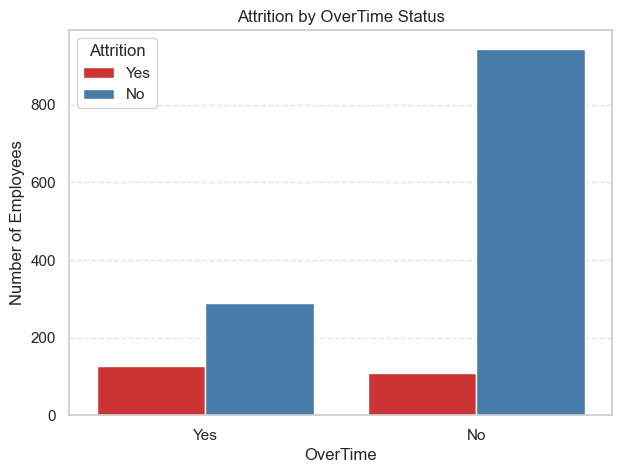

In [69]:
# Countplot: OverTime vs Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by OverTime Status')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

✅ **Observation:**
- A **majority of employees who left** were working **overtime**.
- Employees who did **not** work overtime showed significantly **lower attrition rates**.
- This makes OverTime a **high-impact feature** to explore in modeling and policy insights.


💡 **Business Implication:**
The company could explore adjusting workload, hiring more support staff, or compensating overtime fairly to reduce attrition.


## 5.4 💸 Monthly Income vs Attrition

Let’s check if employees with lower income are more likely to leave the company.

/var/folders/sr/051xkmhj4557z_r9lb7qj8c00000gn/T/ipykernel_11010/3839142465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set3')


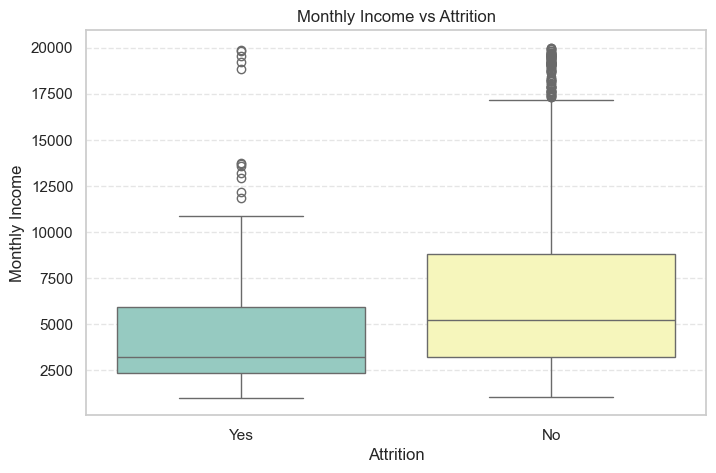

In [70]:
# Boxplot: Income vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set3')
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


✅ **Observation:**
- Employees who left the company had **lower median salaries**.
- There are some high-income employees who still left, but most attrition occurs in the lower income band.
- **MonthlyIncome is likely to be a contributing factor**, especially for junior roles.


## 5.5 🏢 Department vs Attrition

Let’s see which departments have higher attrition rates.

/var/folders/sr/051xkmhj4557z_r9lb7qj8c00000gn/T/ipykernel_11010/1874577854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='coolwarm')


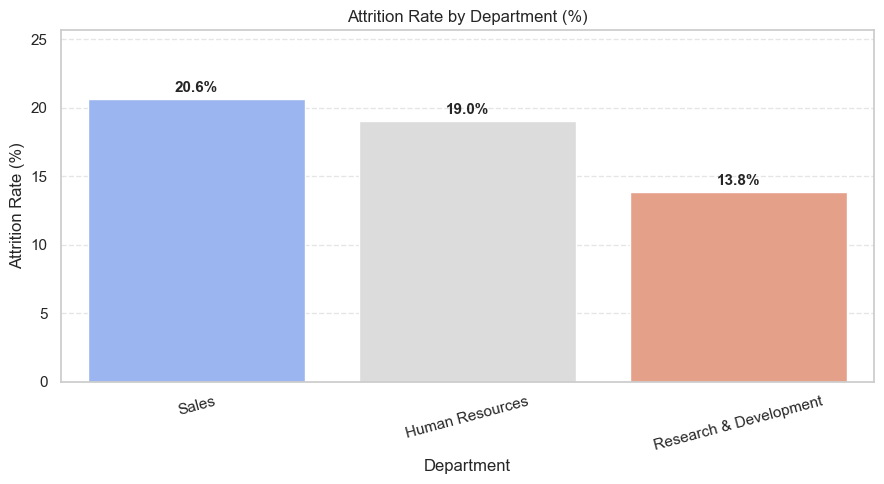

In [81]:
plt.figure(figsize=(9,5))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='coolwarm')

# Add percentage labels on top of bars
for index, value in enumerate(attrition_rate.values):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.title('Attrition Rate by Department (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=15)
plt.ylim(0, attrition_rate.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


✅ **Observation:**

- The **Human Resources** department has the **highest attrition rate**, despite having the smallest workforce.
- **Sales** also shows a relatively **high attrition rate**, which could indicate role stress or performance pressure.
- The **Research & Development** department, while having the largest number of employees, shows **lower relative attrition**, suggesting stronger retention policies or job satisfaction.
- This view helps HR teams **target specific departments** for employee engagement or retention programs.

💡 **Business Insight:** Focusing on improving employee experience in HR and Sales may significantly reduce overall attrition.


# 6: Correlation Heatmap (Numerical Features Only)

## 6.1 Pre-Step: Convert Attrition to Numeric (Temporary)
Seaborn heatmap works with numbers. So first, convert Attrition to 1/0 for this chart:

In [84]:
# Safe copy for correlation work
df_corr = df.copy()

# Temporary encoding just for correlation matrix
df_corr['Attrition_numerical'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

## 6.2 Correlation Heatmap

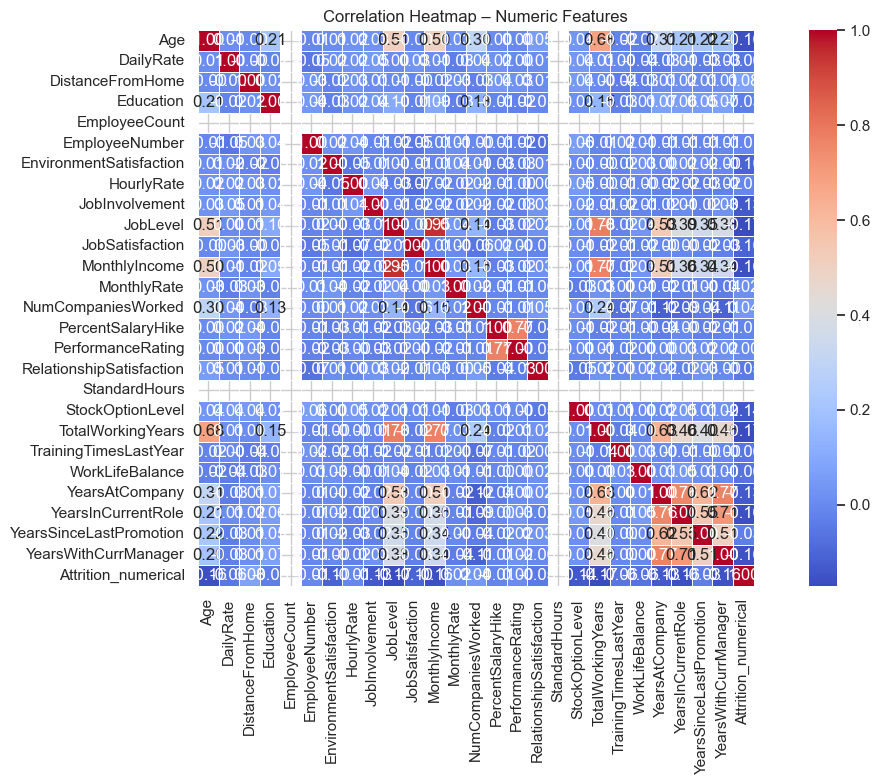

In [83]:
# Select numeric columns
numeric_cols = df_corr.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap – Numeric Features')
plt.tight_layout()
plt.show()

✅ **Observation:**
- `Attrition` is **negatively correlated** with `MonthlyIncome`, `TotalWorkingYears`, and `YearsAtCompany` — suggesting experienced and well-paid employees are less likely to leave.
- `Age` and `YearsAtCompany` show a strong positive correlation — as expected.
- There’s **no extreme multicollinearity**, but a few pairs like `TotalWorkingYears` and `YearsAtCompany` are highly related.

💡 **Insight:** These correlations help guide feature selection and inform modeling strategies.

In [87]:
selected_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'EnvironmentSatisfaction', 'WorkLifeBalance', 'OverTime_numeric',
    'Attrition_numerical'
]


In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(refined_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.6, square=True, cbar=True)
plt.title('Correlation Heatmap – Key Features Only', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'refined_corr' is not defined

<Figure size 1000x800 with 0 Axes>